##  Install and Import Dependencies

In [3]:
!pip install easyocr
!pip install imutils

In [2]:
# import os

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [5]:
!pip install opencv-python

In [5]:
# import opencv

In [6]:
# category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [7]:
# IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.02533422-940e-11eb-9dbd-5cf3709bbcc6.jpg')

## Read in Image, Grayscale and Blur

In [6]:
from PIL import Image

In [7]:
filename = 'img1.png'
img1 = np.array(Image.open(filename))

FileNotFoundError: [Errno 2] No such file or directory: 'img1.png'

In [8]:
import tensorflow as tf

In [9]:
import pathlib
dataset_url = 'D:/Development/Web/xampp/htdocs/ves_curl/img'
data_dir = tf.keras.utils.get_file(orgin=dataset_url, fname='img', untar=TRUE)
data_dir = pathlib.path(data_dir)

NameError: name 'TRUE' is not defined

In [ ]:
# img = cv2.imread(img1)
img = cv2.imread('img8.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
img2 = cv2.imread('img7.jpg')
gray1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray1, cv2.COLOR_BGR2RGB))

##  Apply filter and find edges for localization

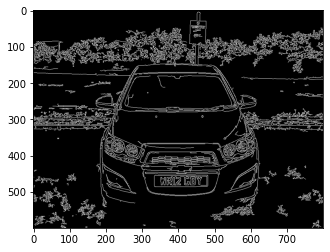

In [9]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Find Contours and Apply Mask

In [13]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [14]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [15]:
location

array([[[334, 457]],

       [[336, 486]],

       [[482, 483]],

       [[481, 454]]], dtype=int32)

In [16]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

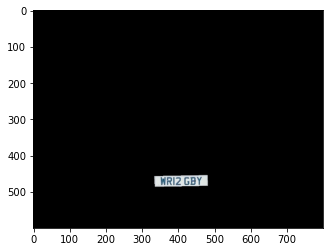

In [17]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [18]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

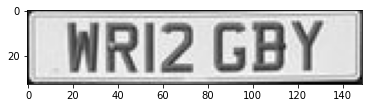

In [19]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Use Easy OCR To Read Text

In [20]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\vimat\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\vimat\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\vimat\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[14, 2], [136, 2], [136, 33], [14, 33]], 'WRI2 GBY', 0.6787921351024631)]

##  Render Result

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
print(text)

In [ ]:
file = open("extraction.txt", "w")

In [ ]:
file.write(text)
file.close()